In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

In [2]:
dados = pd.read_csv("dados_SP_modelo.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
1,1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
2,2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
3,3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
4,4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.10000,0.00000,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.00000,0.00000,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53000
8792,8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.30000,314.60000,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53000
8793,8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.40000,53.50000,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53000


# 1. Feature Engineering

In [3]:
dados2 = dados.drop(columns=['Unnamed: 0', 'cod7d', 'cidade', 'casos_diários', 'mortes_diárias',
                             'casos_por_100mil_hab', 'mortes_por_milhão_hab',
                             'Microrregião Geográfica', 'Nome_Microrregião', 'Mesorregião Geográfica',
                             'Total_Não_SUS', 'Total_SUS'])
dados2

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,2020-05-07,18,5,Quintana-SP,2,0,6638,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,Marília,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,2020-05-07,40,5,São Pedro-SP,36,0,35653,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,Piracicaba,12,4,4,2,0,0,20,36,8,2,0,0,0.53000
8792,2020-05-07,21,5,Arandu-SP,10,2,6357,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,Bauru,0,0,0,0,0,0,3,5,4,0,0,0,0.53000
8793,2020-05-07,36,5,Águas de Lindóia-SP,4,1,18705,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,Campinas,1,7,2,2,0,0,3,15,6,6,0,0,0.53000


Foram excluídas as variáveis cod7d e cidade (ficando apenas com munuf para identificar o município), casos diários e casos por 100 mil habitantes (ficando apenas com casos acumulados), mortes diárias e mortes por milhão de habitantes (ficando apenas com casos acumulados), os totais de leitos SUS e Não SUS, o código da microrregião geográfica e seu nome (pois tem alta correlação com mesorregião geográfica e já temos o município como dado mais granular) e o código da mesorregião geográfica (ficando apenas com o nome da mesorregião).

In [4]:
dados2.isnull().sum()

data                             0
dias_epidemiológicos             0
mês                              0
munuf                            0
casos_acumulados                 0
mortes_acumuladas                0
habitantes                       0
lat                              0
lon                              0
zona geográfica                  0
faixa meridional                 0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Nome_Mesorregião                 0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS               0
Pediátrico_Não_SUS               0
Outras_Especialidades_Não_SUS    0
Hospital/DIA_Não_SUS             0
Cirúrgicos_SUS                   0
Clínicos_SUS                     0
Obstétrico_SUS                   0
Pediátrico_SUS                   0
Outras_Especialidades_SUS        0
Hospital/DIA_SUS    

In [5]:
dados2.dtypes

data                              object
dias_epidemiológicos               int64
mês                                int64
munuf                             object
casos_acumulados                   int64
mortes_acumuladas                  int64
habitantes                         int64
lat                              float64
lon                              float64
zona geográfica                   object
faixa meridional                  object
capital                           object
litoral                           object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Nome_Mesorregião                  object
Cirúrgicos_Não_SUS                 int64
Clínicos_Não_SUS                   int64
Obstétrico_Não_SUS                 int64
Pediátrico_Não_SUS                 int64
Outras_Especialidades_Não_SUS      int64
Hospital/DIA_Não_SUS               int64
Cirúrgicos_SUS                     int64
Clínicos_SUS    

In [6]:
dados2['data'] = pd.to_datetime(dados2['data'], errors='coerce', infer_datetime_format=True)
dados2.dtypes

data                             datetime64[ns]
dias_epidemiológicos                      int64
mês                                       int64
munuf                                    object
casos_acumulados                          int64
mortes_acumuladas                         int64
habitantes                                int64
lat                                     float64
lon                                     float64
zona geográfica                          object
faixa meridional                         object
capital                                  object
litoral                                  object
papel                                    object
idhm_2010                               float64
faixa_pop                                object
Nome_Mesorregião                         object
Cirúrgicos_Não_SUS                        int64
Clínicos_Não_SUS                          int64
Obstétrico_Não_SUS                        int64
Pediátrico_Não_SUS                      

In [7]:
dados2.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
munuf                            383
casos_acumulados                 406
mortes_acumuladas                110
habitantes                       382
lat                              363
lon                              370
zona geográfica                    2
faixa meridional                   2
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Nome_Mesorregião                  15
Cirúrgicos_Não_SUS                76
Clínicos_Não_SUS                  90
Obstétrico_Não_SUS                48
Pediátrico_Não_SUS                46
Outras_Especialidades_Não_SUS     45
Hospital/DIA_Não_SUS              35
Cirúrgicos_SUS                    80
Clínicos_SUS                     117
Obstétrico_SUS                    55
Pediátrico_SUS                    57
O

In [8]:
dados2.head()

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


In [9]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento'],
      dtype='object')

## 1.1. Criar dia do ano

In [10]:
dados2['dia_do_ano'] = [n.dayofyear for n in dados2['data']]
colunas = ['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento']
dados2 = dados2.reindex(columns=colunas)
dados2.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


## 1.2. Criar lags para casos e mortes acumulados

In [11]:
n = 1
radical = 'casos_acumulados_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['casos_acumulados'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [12]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

In [13]:
n = 1
radical = 'mortes_acumuladas_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['mortes_acumuladas'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [14]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

## 1.3. Criar dummies e label encoder para categóricas

In [15]:
dum = pd.get_dummies(dados2, 
                      columns=['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      drop_first=True, 
                      prefix = ['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      prefix_sep='_')
dum.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le_tkt = le.fit_transform(dum['munuf'])
le_tkt_df1 = pd.DataFrame(le_tkt, columns=['LE_munuf'])

le_tkt = le.fit_transform(dum['Nome_Mesorregião'])
le_tkt_df2 = pd.DataFrame(le_tkt, columns=['LE_Nome_Mesorregião'],)

dados_tratados = pd.merge(dum,le_tkt_df1, left_index=True, right_index=True)
dados_tratados = pd.merge(dados_tratados,le_tkt_df2, left_index=True, right_index=True)

dados_tratados.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


In [17]:
dados_tratados.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_men

In [18]:
dados_sel = dados_tratados[['dias_epidemiológicos', 'dia_do_ano', 'mês',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d',
       'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d',
       'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d',
       'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d',
       'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d',
       'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d',
       'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d',
       'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60',
       'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana',
       'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil',
       'faixa_pop_Menor de 10 mil', 'LE_munuf', 'LE_Nome_Mesorregião']]

In [19]:
dados_sel.head()

,dias_epidemiológicos,dia_do_ano,mês,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,1,0,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


## 1.4. Baseline e Validação

Vamos estabelecer que a base para comparação da previsão serão os casos e mortes do dia anterior. Ou seja, se prevíssemos que os casos e mortes de hoje serão iguais aos casos e mortes do dia anterior, o quanto estaríamos errando? O objetivo do modelo será superar esse erro médio.

#### Métricas para avaliar o modelo

Para analisar se as previsões estão com os valores próximos dos dados reais deve-se fazer a medição do erro, o erro (ou resíduo) neste caso é basicamente Yreal − Yprev.

Avalia-se o erro nos dados de treino para verificar se o modelo tem boa assertividade, e valida-se o modelo verificando o erro nos dados de teste (dados que não foram “vistos” pelo modelo).

Abaixo estão as principais métricas usadas para avaliar modelos de séries temporais:

##### Mean Forecast Error — (Erro Médio da Previsão ou Viés)

O erro médio da previsão nada mais é do que a média dos erros da série avaliada, os valores podem ser positivos ou negativos. Essa métrica sugere que o modelo tende a fazer previsões acima do real (erros negativos) ou abaixo do real (erros positivos), desse modo também pode-se dizer que o erro médio é o viés do modelo.

##### MAE — Mean Absolute Error — (Erro Médio Absoluto)

Essa métrica é muito semelhante ao erro médio da previsão mencionado acima, a única diferença é o erro com valor negativo, ou seja, a previsão com valor maior que o número real, é transformado em positivo e posteriormente a média é calculada.

Essa métrica é muito usada em séries temporais, pois há casos que o erro negativo pode zerar o positivo ou dar uma ideia que o modelo é preciso. No caso do MAE isso não acontece, pois essa métrica mostra o quanto a previsão está longe dos valores reais, independente se acima ou abaixo.

##### MSE — Mean Squared Error — (Erro Quadrático Médio)

Essa métrica coloca mais peso nos erros maiores, pois cada valor individual do erro é elevado ao quadrado e posteriormente a média desses valores é calculada. Assim, essa métrica é muito sensível à outliers e coloca bastante peso nas previsões com erros mais significativos.

Diferente do MAE e MFE, os valores do MSE estão em unidades quadráticas e não na unidade do modelo.

##### RMSE — Root Mean Squared Error — (Raiz Quadrada do Erro Quadrático Médio)

Essa métrica é simplesmente a raiz quadrada do MSE, onde o erro volta a ter a unidade de medida do modelo. É muito usada em séries temporais porque é mais sensível à erros maiores devido ao processo de elevação ao quadrado que a originou.

##### MAPE — Mean Absolute Percentage Error — (Erro Percentual Médio Absoluto)

Essa é outra métrica interessante de ser usada, pois o erro é medido em termos percentuais e pode-se comparar o erro percentual do modelo de um objeto X com o erro percentual de um objeto Y. O cálculo dessa métrica pega o valor absoluto do erro dividido pelo resultado real e posteriormente é calculada a média.

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

### 1.4.1. Casos Acumulados

In [21]:
df_casos = dados_tratados[['data', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [22]:
df_casos.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos.rename(columns=colunas, inplace=True)
#df_casos = df_casos.iloc[1:]
df_casos

,real,previsão
data,,
2020-02-26,1,0
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,10


In [23]:
check_erro(df_casos['real'].values, df_casos['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,4.54008
MSE,2534.63900
RMSE,50.34520
MAE,4.65810
MAPE,11.77102


In [24]:
def plotar_erro(df, figsize=(18,8)):
    
    # Criando a coluna do erro
    df['Erro'] = df.iloc[:,0] - df.iloc[:,1]
    
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotando os valores reais e previstos
    ax1.plot(df.iloc[:,0:2])
    ax1.legend(['Real','Prev'])
    ax1.set_title('Valores Previstos vs Resíduo')
    
    # Erro vs Valores previstos
    ax2.scatter(df.iloc[:,1], df.iloc[:,2])
    ax2.set_xlabel('Valores Previstos')
    ax2.set_ylabel('Resíduo')
    ax2.set_title('Resíduo vs Valores Previstos')
    
    ## QQ Plot do erro
    sm.graphics.qqplot(df.iloc[:,2], line='r', ax=ax3)
    
    # Gráfico de autocorrelação do Erro
    plot_acf(df.iloc[:,2], lags=60,zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

C:\Users\gusta\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


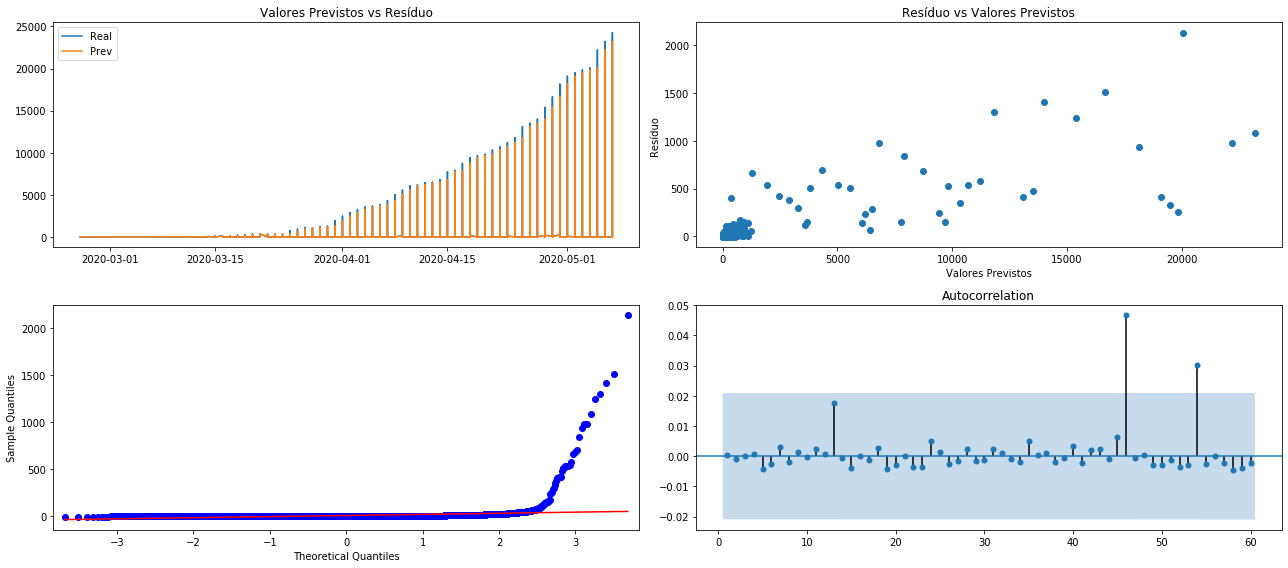

In [25]:
plotar_erro(df_casos)

### 1.4.2. Mortes Acumuladas

In [26]:
df_mortes = dados_tratados[['data', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [27]:
df_mortes.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes.rename(columns=colunas, inplace=True)
#df_mortes = df_mortes.iloc[1:]
df_mortes

,real,previsão
data,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


In [28]:
check_erro(df_mortes['real'].values, df_mortes['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,0.36453
MSE,21.03945
RMSE,4.58688
MAE,0.38204
MAPE,9.12069


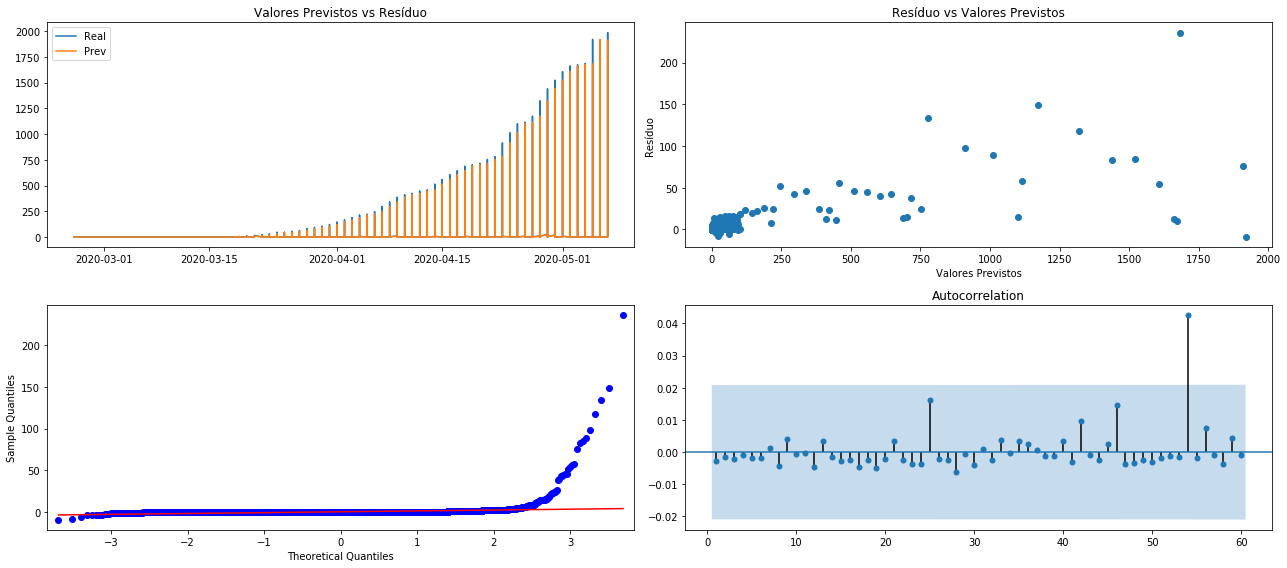

In [29]:
plotar_erro(df_mortes)

## 1.5. Separação da base em variáveis explicativas, target casos acumulados e target mortes acumuladas

In [30]:
pd.set_option('display.max_rows', 20)

In [31]:
explicativas = dados_sel.drop(columns=['casos_acumulados', 'mortes_acumuladas'])

In [32]:
explicativas.dtypes

dias_epidemiológicos            int64
dia_do_ano                      int64
mês                             int64
habitantes                      int64
lat                           float64
                               ...   
faixa_pop_Maior de 100 mil      uint8
faixa_pop_Maior de 50 mil       uint8
faixa_pop_Menor de 10 mil       uint8
LE_munuf                        int32
LE_Nome_Mesorregião             int32
Length: 59, dtype: object

In [33]:
target_casos = dados_sel['casos_acumulados']
target_mortes = dados_sel['mortes_acumuladas']

## 1.6. Modificação da distribuição das targets

Como a distribuição das targets está muito concentrada no zero, vamos aplicar uma função logarítmica para melhorar a performance do modelo.

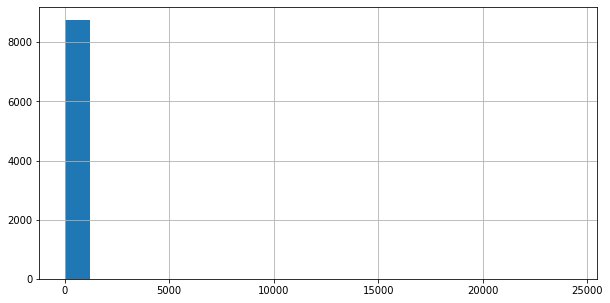

In [34]:
target_casos.hist(bins=20, figsize=(10,5))

In [35]:
target_casos_log = np.log1p(target_casos)

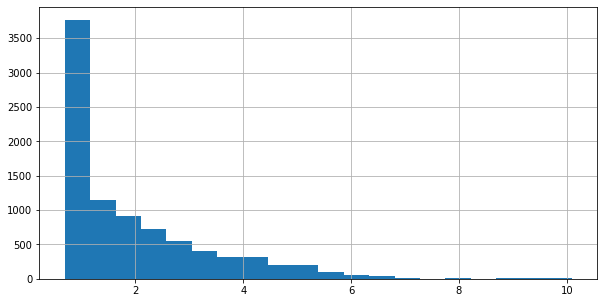

In [36]:
target_casos_log.hist(bins=20, figsize=(10,5))

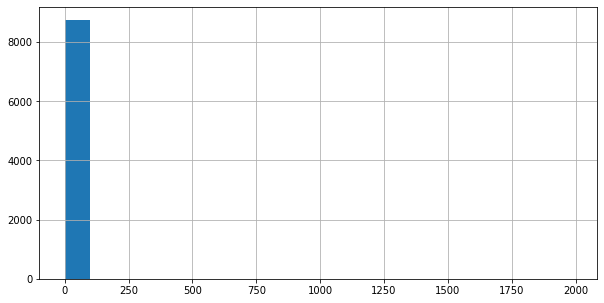

In [37]:
target_mortes.hist(bins=20, figsize=(10,5))

In [38]:
target_mortes_log = np.log1p(target_mortes)

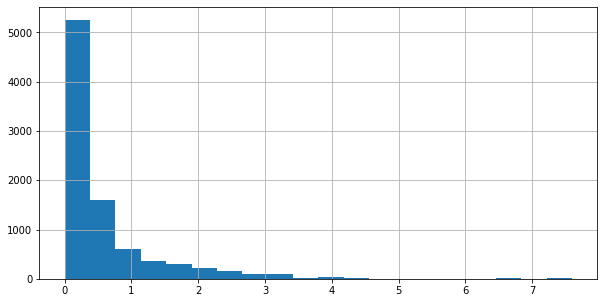

In [39]:
target_mortes_log.hist(bins=20, figsize=(10,5))

## 1.7. Seleção de Variáveis

### 1.7.1. Seleção baseada em filtro

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### 1.7.1.1. Casos acumulados

In [41]:
chi_selector1 = SelectKBest(chi2, k=30)
chi_selector1.fit(explicativas.abs(), target_casos)
chi_support1 = chi_selector1.get_support()
chi_feature1 = explicativas.loc[:,chi_support1].columns.tolist()
print(str(len(chi_feature1)), 'é o numero de variáveis selecionadas')
print(chi_feature1)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


#### 1.7.1.2. Mortes acumuladas

In [42]:
chi_selector2 = SelectKBest(chi2, k=30)
chi_selector2.fit(explicativas.abs(), target_mortes)
chi_support2 = chi_selector2.get_support()
chi_feature2 = explicativas.loc[:,chi_support2].columns.tolist()
print(str(len(chi_feature2)), 'é o numero de variáveis selecionadas')
print(chi_feature2)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


### 1.8.2. Seleção baseada em wrapper

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### 1.8.2.1. Casos acumulados

In [44]:
rfecv_selector1 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector1.fit(explicativas, target_casos_log)
rfecv_support1 = rfecv_selector1.get_support()
rfecv_feature1 = explicativas.loc[:,rfecv_support1].columns.tolist()
print(str(len(rfecv_feature1)), 'é o numero de variáveis selecionadas')
print(rfecv_feature1)

29 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'lat', 'lon', 'idhm_2010', 'Pediátrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Pediátrico_SUS', 'índice_isolamento', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil', 'faixa_pop_Menor de 10 mil']


#### 1.8.2.2. Mortes acumuladas

In [45]:
rfecv_selector2 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector2.fit(explicativas, target_mortes_log)
rfecv_support2 = rfecv_selector2.get_support()
rfecv_feature2 = explicativas.loc[:,rfecv_support2].columns.tolist()
print(str(len(rfecv_feature2)), 'é o numero de variáveis selecionadas')
print(rfecv_feature2)

19 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'idhm_2010', 'índice_isolamento', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil']


### 1.8.3. Seleção baseada em método embarcado

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

#### 1.8.3.1. Casos acumulados

In [47]:
rf_selector1 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector1.fit(explicativas, target_casos)
rf_support1 = rf_selector1.get_support()
rf_feature1 = explicativas.loc[:,rf_support1].columns.tolist()
print(str(len(rf_feature1)), 'é o numero de variáveis selecionadas')
print(rf_feature1)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


#### 1.8.3.2. Mortes acumuladas

In [48]:
rf_selector2 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector2.fit(explicativas, target_mortes)
rf_support2 = rf_selector2.get_support()
rf_feature2 = explicativas.loc[:,rf_support2].columns.tolist()
print(str(len(rf_feature2)), 'é o numero de variáveis selecionadas')
print(rf_feature2)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


### 1.8.4. Comparação dos diferentes métodos de seleção de variáveis

#### 1.8.4.1. Casos acumulados

In [49]:
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support1, 'RFECV': rfecv_support1, 'RF':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [50]:
feature_selection_df[feature_selection_df['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 53 variáveis selecionadas em pelo menos 1 método.

In [51]:
varcasos = feature_selection_df[feature_selection_df['Total']>0]['Variáveis'].to_list()

#### 1.8.4.2. Mortes acumuladas

In [52]:
feature_selection_df2 = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support2, 'RFECV': rfecv_support2, 'RF':rf_support2})

#count
feature_selection_df2['Total'] = np.sum(feature_selection_df2,axis=1)

#print
feature_selection_df2 = feature_selection_df2.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df2.index = range(1, len(feature_selection_df2)+1)
feature_selection_df2

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [53]:
feature_selection_df2[feature_selection_df2['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 47 variáveis selecionadas em pelo menos 1 método.

In [54]:
varmortes = feature_selection_df2[feature_selection_df2['Total']>0]['Variáveis'].to_list()

In [55]:
pd.set_option('display.max_rows', 20)

# 2. Elaboração de Modelos

Estudando as técnicas de modelagem de séries temporais, selecionamos 2 métodos diferentes:
* No primeiro, fazemos uma previsão em laço, ou seja, analisamos os dados do 1º período para prever o 2º, acrescentamos o 2º período ao 1º para prever o 3º e assim por diante. 
* No segundo, que chamaremos de previsão tradicional, dividiremos a base em teste e treino, sendo que a base teste será composta dos primeiros 80% da base e a base treino será composta dos últimos 20%, em ordem cronológica.

## 2.1. Método de Previsão em Laço

### 2.1.1. Random Forest

#### 2.1.1.1. Casos Acumulados

In [56]:
expl_casos = explicativas[varcasos]

In [57]:
expl_casos

,mortes_acumuladas_menos9d,mortes_acumuladas_menos8d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos4d,mortes_acumuladas_menos1d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,mortes_acumuladas_menos11d,lon,litoral_S,lat,idhm_2010,habitantes,faixa_pop_Menor de 10 mil,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Pediátrico_SUS,Pediátrico_Não_SUS,Outras_Especialidades_SUS,Hospital/DIA_Não_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,1,57,1,1280,917,2805,675,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,2,58,1,1280,917,2805,675,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,3,59,1,1280,917,2805,675,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,4,60,1,1280,917,2805,675,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,5,61,1,1285,920,2805,649,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,-50.30800,0,-22.07300,0.73200,6638,1,0,0,1,18,128,0,0,0,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,-47.91400,0,-22.54900,0.75500,35653,0,0,0,0,40,128,0,2,2,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,2,-49.05400,0,-23.13400,0.68500,6357,1,0,0,0,21,128,0,0,0,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,1,-46.63300,0,-22.47600,0.74500,18705,0,0,0,0,36,128,0,6,2,0,0,15,7,3,1


In [58]:
df_casos_baseline_lasso = dados_tratados[['dia_do_ano', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [59]:
df_casos_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos_baseline_lasso.rename(columns=colunas, inplace=True)
df_casos_baseline_lasso

,real,previsão
dia_do_ano,,
57,1,0
58,1,1
59,1,1
60,1,1
61,1,1
...,...,...
128,2,2
128,36,27
128,10,10


#### Sem modificação da distribuição das targets

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [62]:
RFR = RandomForestRegressor(random_state=14)

In [63]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [64]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [65]:
xtr = expl_casos[explicativas['dia_do_ano'] < 128]
xts = expl_casos[explicativas['dia_do_ano'] == 128]
ytr, yts = target_casos[explicativas['dia_do_ano'] < 128].values, target_casos[explicativas['dia_do_ano'] == 128].values

In [66]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(xtr, ytr)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [67]:
grid_RFR_treino.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0}

In [68]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [69]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        #RFR = RandomForestRegressor(bootstrap=False, criterion='mse', max_features=None, n_estimators=1000,
        #                            n_jobs=-1, oob_score=False, random_state=14, verbose=0)
        #RFR.fit(xtr,ytr)
        grid_RFR_best.fit(xtr,ytr)

        #p = np.expm1(RFR.predict(xts))
        #p = RFR.predict(xts)
        p = grid_RFR_best.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Random Forest ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 62 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 50.0
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 64 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 33.33333333333333
Dia do ano 65 - Viés 3.0, MSE 9.0, RMSE 3.0, MAE 3.0, MAPE 50.0
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 67 - Viés 0.5700000000000003, MSE 0.3249000000000003, RMSE 0.5700000000000003, MAE 0.5700000000000003, MAPE 9.500000000000004
Dia do ano 68 - Viés 4.13, MSE 40.7738, RMSE 6.385436555162067, MAE 4.87, MAPE 67.0
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 70 - Viés 1.495, MSE 4.50005, RMSE 2.121332128639926, MAE 1.505, MAPE 8.833333333333334
Dia do ano 71 - Viés 5.99, MSE 72.

Dia do ano 126 - Viés 6.805174418604651, MSE 13518.03140232558, RMSE 116.26706929447211, MAE 9.819941860465118, MAPE 10.987894901340988
Dia do ano 127 - Viés 1.812857142857142, MSE 2968.414117789757, RMSE 54.48315444052186, MAE 6.405417789757412, MAPE 20.614839273687966
Dia do ano 128 - Viés 1.235301837270345, MSE 4074.815025459326, RMSE 63.83427782515697, MAE 6.979711286089244, MAPE 13.676223168092353


* Sem modificação das targets, a Random Forest conseguiu prever os 128 dias.

In [70]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [71]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [72]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [73]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [74]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,30
2020-05-07,10,11


Text(0, 0.5, 'previsão')

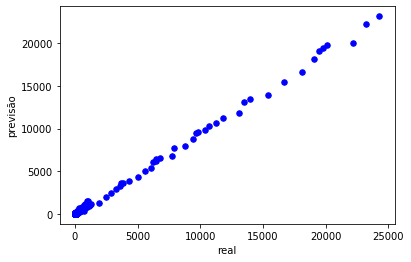

In [75]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [76]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,69.41960
std,818.10473,776.13407
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,13.00000
max,24273.00000,23158.00000


Sem log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	69.41960
* std 	818.10473 	776.13407
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	13.00000
* max 	24273.00000 	23158.00000

In [77]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [78]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Random Forest Sem Modificação da Distr. Target (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [79]:
erro_teste

,Baseline,Random Forest Sem Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,4.54008,1.66887
MSE,2534.63900,2816.98453
RMSE,50.34520,53.07527
MAE,4.65810,5.67432
MAPE,11.77102,13.45639


sem log1p

*  	Baseline 	Random Forest ScikitLearn (laço) 
* Base Teste 		
* VIÉS 	4.54008 	1.66887
* MSE 	2534.63900 	2816.98453
* RMSE 	50.34520 	53.07527
* MAE 	4.65810 	5.67432
* MAPE 	11.77102 	13.45639

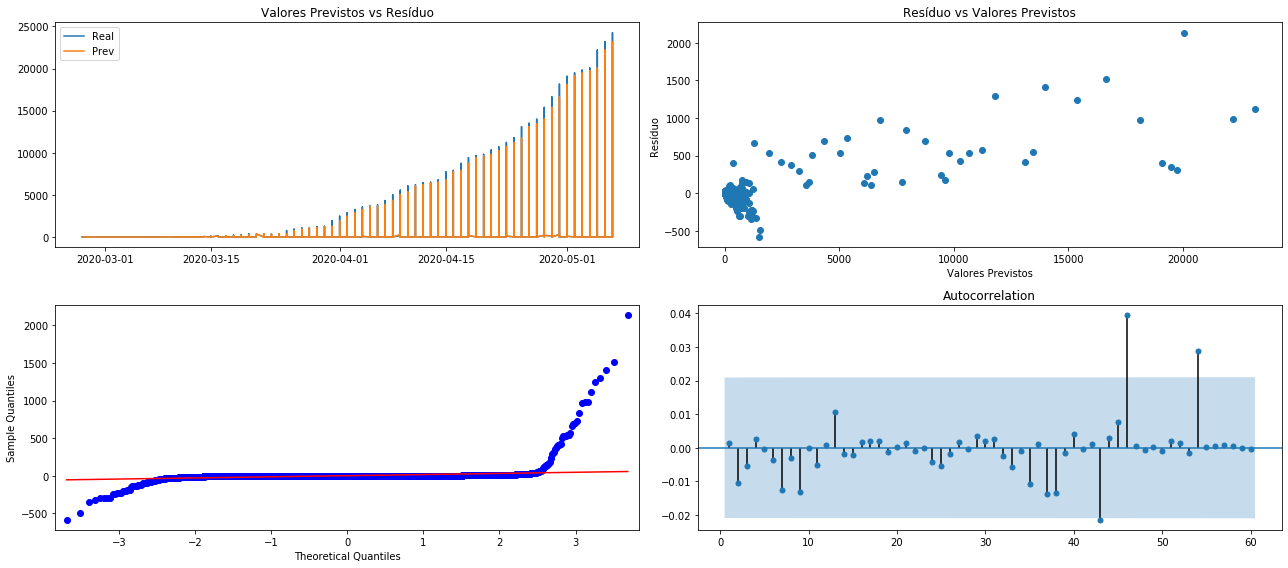

In [80]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com Random Forest com GridSearch sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a Random Forest com GridSearch conseguiu melhorar o resultado em comparação com a Random Forest com GridSearch (5.67 de MAE contra 5.8), mas ainda perder para a baseline (que apenas repete o resultado do dia anterior) - 4.65 de MAE. 

#### Com modificação da distribuição das targets

In [81]:
RFR = RandomForestRegressor(random_state=14)

In [82]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [-1],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [83]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [84]:
xtr = expl_casos[explicativas['dia_do_ano'] < 128]
xts = expl_casos[explicativas['dia_do_ano'] == 128]
ytr, yts = target_casos_log[explicativas['dia_do_ano'] < 128].values, target_casos_log[explicativas['dia_do_ano'] == 128].values

In [85]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(xtr, ytr)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [-1],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [86]:
grid_RFR_treino.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 'auto',
 'n_estimators': 250,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 14,
 'verbose': 0}

In [87]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [88]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        #RFR = DecisionTreeRegressor(criterion='mae', random_state=14)
        #RFR.fit(xtr,ytr)
        
        grid_RFR_best.fit(xtr,ytr)
        
        p = np.expm1(grid_RFR_best.predict(xts))
        #p = np.expm1(RFR.predict(xts))
        #p = RFR.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Random Forest ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Dia do ano 58 - Viés -0.3068528194400574, MSE 0.09415865279831245, RMSE 0.3068528194400574, MAE 0.3068528194400574, MAPE 44.269504088896724
Dia do ano 59 - Viés -0.3068528194400574, MSE 0.09415865279831245, RMSE 0.3068528194400574, MAE 0.3068528194400574, MAPE 44.269504088896724
Dia do ano 60 - Viés -0.3068528194400574, MSE 0.09415865279831245, RMSE 0.3068528194400574, MAE 0.3068528194400574, MAPE 44.269504088896724
Dia do ano 61 - Viés -0.3068528194400574, MSE 0.09415865279831245, RMSE 0.3068528194400574, MAE 0.3068528194400574, MAPE 44.269504088896724
Dia do ano 62 - Viés 0.09861228866810712, MSE 0.009724383476362087, RMSE 0.09861228866810712, MAE 0.09861228866810712, MAPE 8.976077337316026
Dia do ano 63 - Viés -0.49394523598720075, MSE 0.24398189615445143, RMSE 0.49394523598720075, MAE 0.49394523598720075, MAPE 44.96083296010003
Dia do ano 64 - Viés -0.4991751771660844, MSE 0.24917585749879173, RMSE 0.4991751771660844, MAE 0.4991751771660844, MAPE 36.00787763161898
Dia do ano 65 - V

Dia do ano 119 - Viés -72.25176827027119, MSE 629767.3371905993, RMSE 793.5788159915808, MAE 72.28022376916577, MAPE 1058.907988016521
Dia do ano 120 - Viés -77.12473860267635, MSE 708995.8505838931, RMSE 842.018913435971, MAE 77.13904083552578, MAPE 1135.5164417492342
Dia do ano 121 - Viés -80.9207254971868, MSE 799039.7371252599, RMSE 893.8902265520414, MAE 80.92296424544377, MAPE 1171.5337801271005
Dia do ano 122 - Viés -85.78679224493344, MSE 884525.1839108935, RMSE 940.4919903491435, MAE 85.80013446870794, MAPE 1242.479650020059
Dia do ano 123 - Viés -91.11989544077277, MSE 1006118.3630555385, RMSE 1003.0545164922685, MAE 91.11989544077277, MAPE 1314.963810672802
Dia do ano 124 - Viés -94.53846777018414, MSE 1094365.4193428752, RMSE 1046.1192185132988, MAE 94.53846777018414, MAPE 1351.815405612827
Dia do ano 125 - Viés -96.5217601315934, MSE 1145993.8236423119, RMSE 1070.511010518954, MAE 96.52258162949644, MAPE 1375.6103470179198
Dia do ano 126 - Viés -94.96074457408538, MSE 1168

* Com modificação das targets, a Random Forest conseguiu prever os 128 dias.

In [89]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [90]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [91]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [92]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [93]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,29
2020-05-07,10,11


Text(0, 0.5, 'previsão')

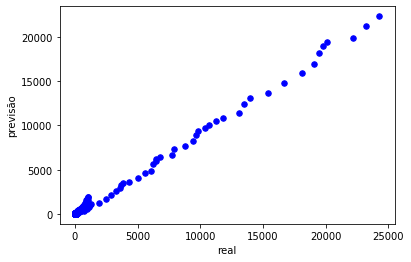

In [94]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [95]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,67.67194
std,818.10473,749.35480
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,13.00000
max,24273.00000,22334.00000


Com log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	67.67194
* std 	818.10473 	749.35480
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	13.00000
* max 	24273.00000 	22334.00000

In [96]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [97]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Random Forest Com Modificação da Distr. Target (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [98]:
erro_teste

,Baseline,Random Forest Com Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,4.54008,3.41653
MSE,2534.63900,6331.00398
RMSE,50.34520,79.56761
MAE,4.65810,7.42199
MAPE,11.77102,11.18903


Com log1p:
*  	Baseline 	Random Forest ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	3.41653
* MSE 	2534.63900 	6331.00398
* RMSE 	50.34520 	79.56761
* MAE 	4.65810 	7.42199
* MAPE 	11.77102 	11.18903

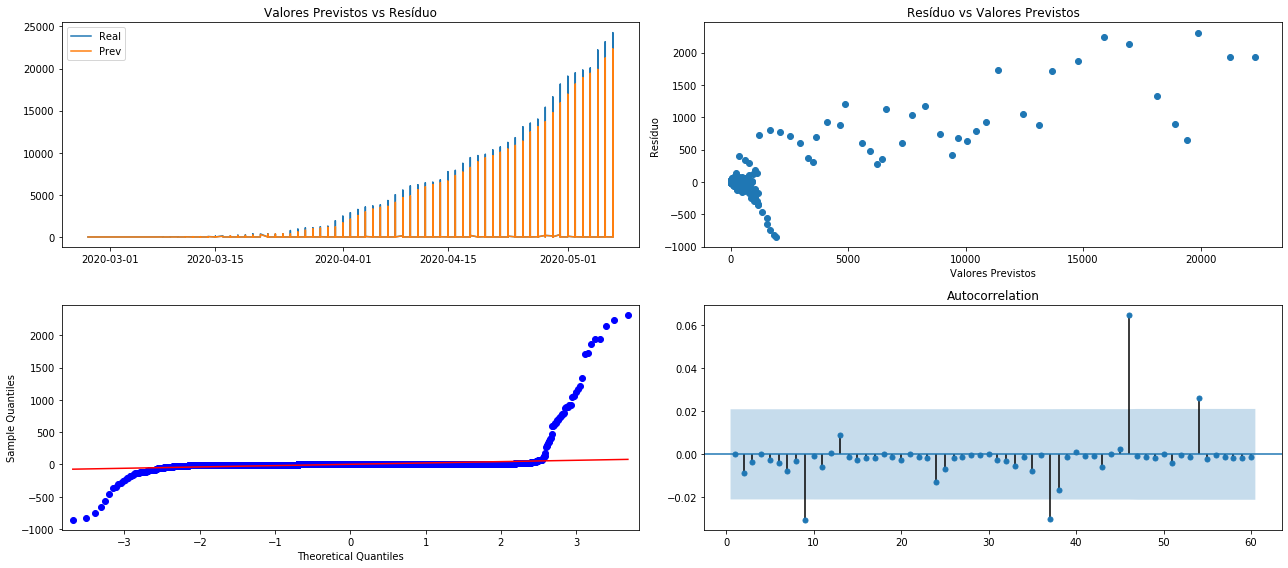

In [99]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com Random Forest com GridSearch e modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. O desempenho foi pior do que com a base sem modificação da distribuição da target.

#### 2.1.1.2. Mortes Acumuladas

In [100]:
expl_mortes = explicativas[varmortes]

In [101]:
expl_mortes

,mortes_acumuladas_menos8d,mortes_acumuladas_menos1d,mortes_acumuladas_menos9d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos4d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos11d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,litoral_S,idhm_2010,habitantes,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Outras_Especialidades_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,1,57,1,2805,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,2,58,1,2805,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,3,59,1,2805,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,4,60,1,2805,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,0.80500,12252023,0,1,0,5,61,1,2805,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,0.73200,6638,0,0,1,18,128,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,0.75500,35653,0,0,0,40,128,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,0,0.68500,6357,0,0,0,21,128,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,0,0.74500,18705,0,0,0,36,128,0,0,15,7,3,1


In [102]:
df_mortes_baseline_lasso = dados_tratados[['dia_do_ano', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [103]:
df_mortes_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes_baseline_lasso.rename(columns=colunas, inplace=True)
df_mortes_baseline_lasso

,real,previsão
dia_do_ano,,
57,0,0
58,0,0
59,0,0
60,0,0
61,0,0
...,...,...
128,0,0
128,0,0
128,2,2


#### Sem modificação da distribuição das targets

In [104]:
RFR = RandomForestRegressor(random_state=14)

In [105]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [106]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [107]:
xtr = expl_mortes[explicativas['dia_do_ano'] < 128]
xts = expl_mortes[explicativas['dia_do_ano'] == 128]
ytr, yts = target_mortes[explicativas['dia_do_ano'] < 128].values, target_mortes[explicativas['dia_do_ano'] == 128].values

In [108]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(xtr, ytr)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [109]:
grid_RFR_treino.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'n_estimators': 250,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0}

In [110]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [111]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        #RFR = DecisionTreeRegressor(criterion='mae', random_state=14)
        #RFR.fit(xtr,ytr)
        grid_RFR_best.fit(xtr,ytr)

        #p = np.expm1(RFR.predict(xts))
        #p = RFR.predict(xts)
        p = grid_RFR_best.predict(xts)
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Random Forest ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 74 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 75 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 77 - Viés 0.125, MSE 0.125, RMSE 0.3535533905932738, MAE 0.125, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 78 - Viés 0.06225, MSE 0.062501, RMSE 0.25000199999200007, MAE 0.06275, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 79 - Viés 0.17647058823529413, MSE 0.5294117647058824, RMSE 0.7276068751089989, MAE 0.17647058823529413, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 80 - Viés 0.2, MSE 0.8, RMSE 0.8944271909999159, MAE 0.2, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 81 - Viés 0.2608695652173913, MSE 1.565217391304348, RMSE 1.2510864843424485, MAE 0.2608695652173913, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 82 - Viés 0.30434782608695654, MSE 2.130434782608696, RMSE 1.4596008983995234, MAE 0.30434782608695654, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 83 - Viés 0.34782608695652173, MSE 2.782608695652174, RMSE 1.6681153124565982, MAE 0.34782608695652173, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 84 - Viés 0.7081739130434783, MSE 10.205345391304348, RMSE 3.1945806283930835, MAE 0.7081739130434783, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 85 - Viés -0.0033548387096774194, MSE 0.0007081290322580645, RMSE 0.026610693945443523, MAE 0.010580645161290323, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 86 - Viés 0.3234444444444445, MSE 2.334640444444444, RMSE 1.52795302429245, MAE 0.3425555555555555, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 87 - Viés 0.24747368421052637, MSE 2.20153052631579, RMSE 1.4837555480320166, MAE 0.325578947368421, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 88 - Viés 0.39873684210526317, MSE 6.741133473684212, RMSE 2.596369286847349, MAE 0.4547368421052631, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 89 - Viés 0.27140425531914897, MSE 3.621637787234043, RMSE 1.9030601113033827, MAE 0.3243404255319149, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 90 - Viés 0.2239183673469388, MSE 2.977269224489797, RMSE 1.725476520990592, MAE 0.3772244897959184, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 91 - Viés 0.27856716417910454, MSE 5.566300656716421, RMSE 2.3593008830406563, MAE 0.41755223880597025, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 92 - Viés 0.32454794520547936, MSE 7.370620712328766, RMSE 2.7148887108551554, MAE 0.4674520547945207, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 93 - Viés 0.22810389610389614, MSE 5.388093714285715, RMSE 2.321226769250629, MAE 0.4152207792207792, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 94 - Viés 0.2808735632183908, MSE 5.774017287356322, RMSE 2.402918493698095, MAE 0.43885057471264377, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 95 - Viés 0.29508333333333336, MSE 7.267421333333334, RMSE 2.695815522867493, MAE 0.4855833333333333, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 96 - Viés 0.06279166666666666, MSE 0.8473751666666667, RMSE 0.9205298293193256, MAE 0.2684583333333333, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 97 - Viés 0.15357009345794395, MSE 6.16578990654206, RMSE 2.4831008651567217, MAE 0.4201869158878506, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés 0.33737815126050424, MSE 23.261230655462185, RMSE 4.822989804619349, MAE 0.7208403361344536, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés 0.23141176470588237, MSE 14.209046352941174, RMSE 3.7694888715767783, MAE 0.5979411764705882, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés 0.24880555555555547, MSE 15.240667888888888, RMSE 3.9039298007122114, MAE 0.6093611111111111, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés 0.13139473684210543, MSE 6.178361789473693, RMSE 2.4856310646340285, MAE 0.48597368421052645, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -0.12254999999999996, MSE 2.154369, RMSE 1.4677768904026252, MAE 0.3793, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -0.14817283950617274, MSE 5.658551012345682, RMSE 2.378770903711764, MAE 0.4809629629629629, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés -0.1177108433734938, MSE 1.8944488674698832, RMSE 1.3763897948872925, MAE 0.34975903614457843, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés 0.19045303867403315, MSE 19.196808662983422, RMSE 4.381416285059367, MAE 0.6633370165745855, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés 0.12505050505050502, MSE 12.321933737373739, RMSE 3.510261206430903, MAE 0.5985454545454546, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés 0.17476328502415464, MSE 10.47132722705314, RMSE 3.2359430197475882, MAE 0.4638067632850241, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés 0.25088, MSE 7.667815253333335, RMSE 2.769082023583508, MAE 0.4496, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés 0.0427964601769912, MSE 12.157128637168144, RMSE 3.4867074206431696, MAE 0.516212389380531, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -0.13736244541484718, MSE 2.148110951965065, RMSE 1.4656435282718185, MAE 0.393117903930131, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -0.2678461538461536, MSE 4.045761299145306, RMSE 2.0114077903660674, MAE 0.43755555555555575, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés -0.0426166666666666, MSE 7.712349800000006, RMSE 2.7771117730476758, MAE 0.45465000000000005, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés -0.04614876033057841, MSE 4.586850512396703, RMSE 2.141693374971474, MAE 0.3819504132231406, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés 0.6308593750000001, MSE 70.77276043750001, RMSE 8.412654779408223, MAE 0.825484375, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés 0.4415373134328358, MSE 36.62570632835821, RMSE 6.051917574484819, MAE 0.6984029850746267, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés 0.3300851063829788, MSE 28.72043704964539, RMSE 5.359145179004334, MAE 0.6303120567375886, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -0.1691590106007067, MSE 2.723145724381625, RMSE 1.6501956624538876, MAE 0.34843816254416965, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés 0.18806968641115007, MSE 15.364676013937311, RMSE 3.9197800976505444, MAE 0.5832473867595822, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés 0.4905514950166112, MSE 75.63444390697674, RMSE 8.69680653498609, MAE 0.8655946843853822, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés 0.3936282051282051, MSE 45.09279194871795, RMSE 6.715116674244607, MAE 0.6304487179487179, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés 0.1009221183800623, MSE 22.514083937694707, RMSE 4.744900835391053, MAE 0.5404735202492212, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés 0.06206060606060627, MSE 24.665838739393973, RMSE 4.966471457624011, MAE 0.5914181818181821, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -0.10209009009009007, MSE 10.803019387387387, RMSE 3.286794698089217, MAE 0.4668708708708709, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -0.17654054054054033, MSE 1.952339843843849, RMSE 1.3972615516945455, MAE 0.3309909909909912, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -0.2051940298507463, MSE 2.3758728119402983, RMSE 1.5413866523167696, MAE 0.36366567164179103, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés 0.8389186046511629, MSE 163.75489474418603, RMSE 12.796675144121853, MAE 1.0985, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -0.25497574123989225, MSE 2.1540544258760113, RMSE 1.467669726428944, MAE 0.39511590296495963, MAPE nan
Dia do ano 128 - Viés 0.06103937007874001, MSE 16.04058834645667, RMSE 4.005070329776578, MAE 0.5081574803149604, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Sem modificação das targets, a Random Forest conseguiu prever os 128 dias.

In [112]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [113]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [114]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [115]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [116]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

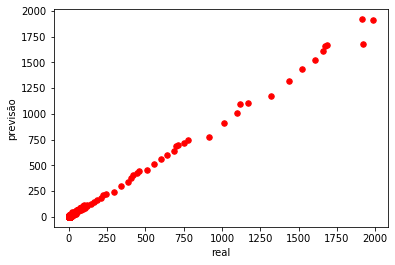

In [117]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [118]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,5.36514
std,67.05556,63.63013
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1919.00000


Sem log1p:

* 	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	5.36514
* std 	67.05556 	63.63013
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1919.00000

In [119]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [120]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Random Forest Sem Modificação da Distr. Target (laço)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [121]:
erro_teste

,Baseline,Random Forest Sem Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,0.36453,0.16898
MSE,21.03945,21.90721
RMSE,4.58688,4.68051
MAE,0.38204,0.48556
MAPE,nan,inf


Sem log1p:
* Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	0.16898
* MSE 	21.03945 	21.90721
* RMSE 	4.58688 	4.68051
* MAE 	0.38204 	0.48556
* MAPE 	nan 	inf

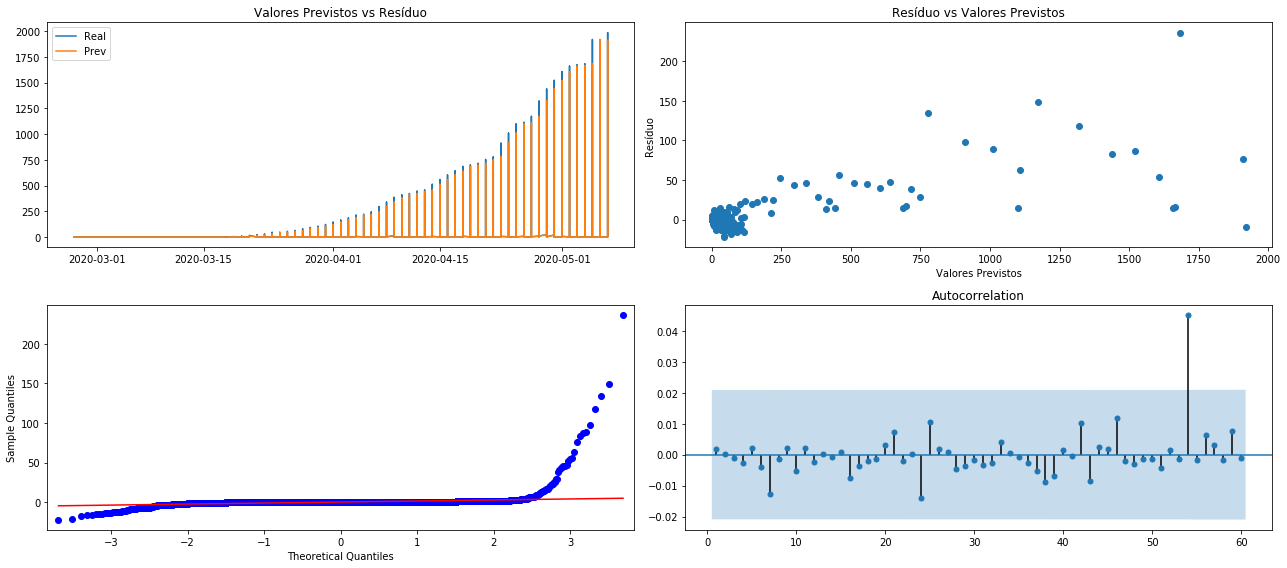

In [122]:
plotar_erro(df_mortes_teste_lasso)

Com Random Forest e GridSearch sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente.
Com a base teste, a Random Forest com GridSearch teve desempenho pouco pior que a baseline, equivalente à àrvore de decisão sem GridSearch (melhorou o MAE, mas piorou o RMSE), mas muito melhor do que a regressão linear. O erro médio absoluto foi de 0.56 mortes, contra 0.38 mortes na baseline (que apenas repete o resultado do dia anterior). 

#### Com modificação da distribuição das targets

In [123]:
RFR = RandomForestRegressor(random_state=14)

In [124]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [125]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [126]:
xtr = expl_mortes[explicativas['dia_do_ano'] < 128]
xts = expl_mortes[explicativas['dia_do_ano'] == 128]
ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < 128].values, target_mortes_log[explicativas['dia_do_ano'] == 128].values

In [127]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(xtr, ytr)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [128]:
grid_RFR_treino.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': 14,
 'verbose': 0}

In [129]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [130]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        #RFR = DecisionTreeRegressor(criterion='mae', random_state=14)
        #RFR.fit(xtr,ytr)
        grid_RFR_best.fit(xtr, ytr)

        #p = np.expm1(RFR.predict(xts))
        #p = RFR.predict(xts)
        p=np.expm1(grid_RFR_best.predict(xts))
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Random Forest ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Random Forest ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 74 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 75 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 77 - Viés 0.08664339756999316, MSE 0.060056626739775174, RMSE 0.24506453586713678, MAE 0.08664339756999316, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 78 - Viés 0.0351085692112561, MSE 0.01972178611298496, RMSE 0.1404342768450244, MAE 0.0351085692112561, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 79 - Viés 0.011437737106961061, MSE 0.002223971112175218, RMSE 0.047158998210047015, MAE 0.011437737106961061, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 80 - Viés -0.05044210249305827, MSE 0.050888114078403913, RMSE 0.22558394020497982, MAE 0.05044210249305827, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 81 - Viés -0.16384082381400275, MSE 0.617407757605175, RMSE 0.7857529876527196, MAE 0.16384082381400275, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 82 - Viés -0.3453006007567967, MSE 2.742347612309108, RMSE 1.6560035061282654, MAE 0.3453006007567967, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 83 - Viés -0.6317831881313154, MSE 9.180449926523488, RMSE 3.0299257295391726, MAE 0.6317831881313154, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 84 - Viés -0.8726886984544077, MSE 18.76804992606091, RMSE 4.332210743495855, MAE 0.9329623663291854, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 85 - Viés -1.1316911375790155, MSE 39.764390493709065, RMSE 6.305901243574075, MAE 1.1446482672647644, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 86 - Viés -1.0696243462887542, MSE 45.1897454436768, RMSE 6.722331845697354, MAE 1.1851488763820783, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 87 - Viés -1.2053432603053686, MSE 52.88830220141181, RMSE 7.27243440681398, MAE 1.2196037544216478, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 88 - Viés -1.4214650658586, MSE 72.43260067458739, RMSE 8.510734438025157, MAE 1.4214650658586, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 89 - Viés -1.4020884169071621, MSE 88.38446006447583, RMSE 9.401300977230536, MAE 1.4315840416118404, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 90 - Viés -1.572550933090658, MSE 116.48093034672506, RMSE 10.792633151679208, MAE 1.657426098057182, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 91 - Viés -1.3314022244371804, MSE 112.4403639277534, RMSE 10.603790073730874, MAE 1.4015278152798802, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 92 - Viés -1.5191578681877007, MSE 148.66122092432357, RMSE 12.19267078717061, MAE 1.5782632891296726, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 93 - Viés -1.6888789863217322, MSE 192.60640553071272, RMSE 13.878270984914248, MAE 1.7349928254759723, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 94 - Viés -1.7218917819842567, MSE 233.75414074497476, RMSE 15.289020267661847, MAE 1.8174005430752966, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 95 - Viés -1.8814868255384838, MSE 285.5159706678399, RMSE 16.8972178380892, MAE 1.9796955209841076, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 96 - Viés -2.2077234911312873, MSE 374.718725018721, RMSE 19.357652879900524, MAE 2.2387615854203147, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 97 - Viés -2.171090113375577, MSE 389.7252633644644, RMSE 19.741460517511474, MAE 2.1921289496811247, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés -2.1127456139918244, MSE 418.26179338584194, RMSE 20.45144966465316, MAE 2.189379082369052, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés -2.2502016279545645, MSE 520.134486340604, RMSE 22.806457119434487, MAE 2.3135633743113826, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés -2.510890482205348, MSE 665.1172795941416, RMSE 25.789867770001102, MAE 2.57534827341518, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés -2.502778261639838, MSE 644.5586380729106, RMSE 25.388159406954074, MAE 2.551659273987585, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -2.8668471593389406, MSE 862.9383967259124, RMSE 29.37581312450623, MAE 2.8776379759194577, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -2.963246468444733, MSE 909.9918986914241, RMSE 30.166071979815737, MAE 2.9764117352656663, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés -3.1405178163033685, MSE 1087.2460449984158, RMSE 32.97341421506751, MAE 3.156833219113759, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés -2.9988385555029073, MSE 1084.223823404768, RMSE 32.92755416675779, MAE 3.046538998163748, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés -3.0801057847951667, MSE 1164.8391434965731, RMSE 34.12973986857464, MAE 3.1252079762943366, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés -3.3307700442817123, MSE 1351.228690990894, RMSE 36.759062705554584, MAE 3.3582951108249244, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés -3.3509007086481244, MSE 1479.7507700260774, RMSE 38.467528774618174, MAE 3.4055586590740723, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés -3.7156547290387114, MSE 1595.6208459760815, RMSE 39.945223068297935, MAE 3.7189241580845467, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -4.0029008393901195, MSE 1903.1529098997603, RMSE 43.625140800916164, MAE 4.026068584916643, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -3.979857139371274, MSE 1962.3629778486484, RMSE 44.29856631820773, MAE 3.9888370795162884, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés -3.8160767626506416, MSE 1930.0996501742547, RMSE 43.932899405505374, MAE 3.8297770976781664, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés -4.0056835742178984, MSE 2185.11797854905, RMSE 46.74524551811713, MAE 4.025224588919722, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés -3.8915455318060137, MSE 2257.304880116191, RMSE 47.511102703643814, MAE 3.9780280314290293, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés -4.352773102522326, MSE 2679.8194369022635, RMSE 51.766972452542205, MAE 4.407090352264081, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés -4.656620910492675, MSE 2954.419665859254, RMSE 54.35457355052336, MAE 4.689444404346166, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -5.326158473999535, MSE 3788.3314043317187, RMSE 61.54942245327505, MAE 5.326158473999535, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés -5.335684323513912, MSE 4050.693354777736, RMSE 63.64505758326986, MAE 5.355692451832272, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés -5.52750172207602, MSE 4343.147462333976, RMSE 65.90256036250774, MAE 5.567160322825547, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés -5.973574288186773, MSE 5087.264732159273, RMSE 71.32506384265824, MAE 5.985841005835982, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés -6.4056713587902365, MSE 5832.371130540415, RMSE 76.36996222691494, MAE 6.420891504231618, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés -6.503932886170677, MSE 6104.000314465585, RMSE 78.1281019509983, MAE 6.51594168350909, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -6.86240955188454, MSE 6873.338677640274, RMSE 82.90560100282896, MAE 6.862854812056678, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -7.204699746845688, MSE 7820.43022505189, RMSE 88.43319639734781, MAE 7.217217750752147, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -7.382699960974662, MSE 8133.954028152232, RMSE 90.18843622190282, MAE 7.382699960974662, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés -7.210683872344196, MSE 8131.343955136397, RMSE 90.17396495184404, MAE 7.246062224534334, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -7.623446651080604, MSE 9131.968367750298, RMSE 95.56133301576689, MAE 7.63176688286459, MAPE nan
Dia do ano 128 - Viés -7.597220863835467, MSE 9302.47378687915, RMSE 96.44933274460301, MAE 7.624696354815062, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Com modificação das targets, a Random Forest conseguiu prever os 128 dias.

In [131]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [132]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [133]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [134]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [135]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

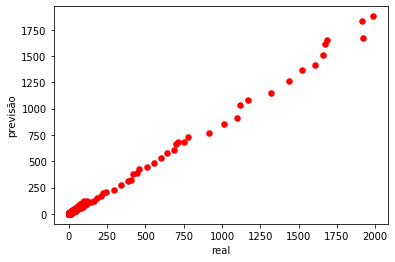

In [136]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [137]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,5.16102
std,67.05556,61.24891
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1878.00000


Com log1p:

*  	real 	previsão
* count 	8794.00000 	8794.00000
* count 	8794.00000 	8794.00000
* mean 	5.53411 	4.07084
* std 	67.05556 	44.00049
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1480.00000

In [138]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [139]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Random Forest Com Modificação da Distr. Target (laço)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [140]:
erro_teste

,Baseline,Random Forest Com Modificação da Distr. Target (laço)
Base Teste,,
VIÉS,0.36453,0.37310
MSE,21.03945,45.94485
RMSE,4.58688,6.77826
MAE,0.38204,0.60075
MAPE,nan,inf


Com log1p:
*  	Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	0.37310
* MSE 	21.03945 	45.94485
* RMSE 	4.58688 	6.77826
* MAE 	0.38204 	0.60075
* MAPE 	nan 	inf

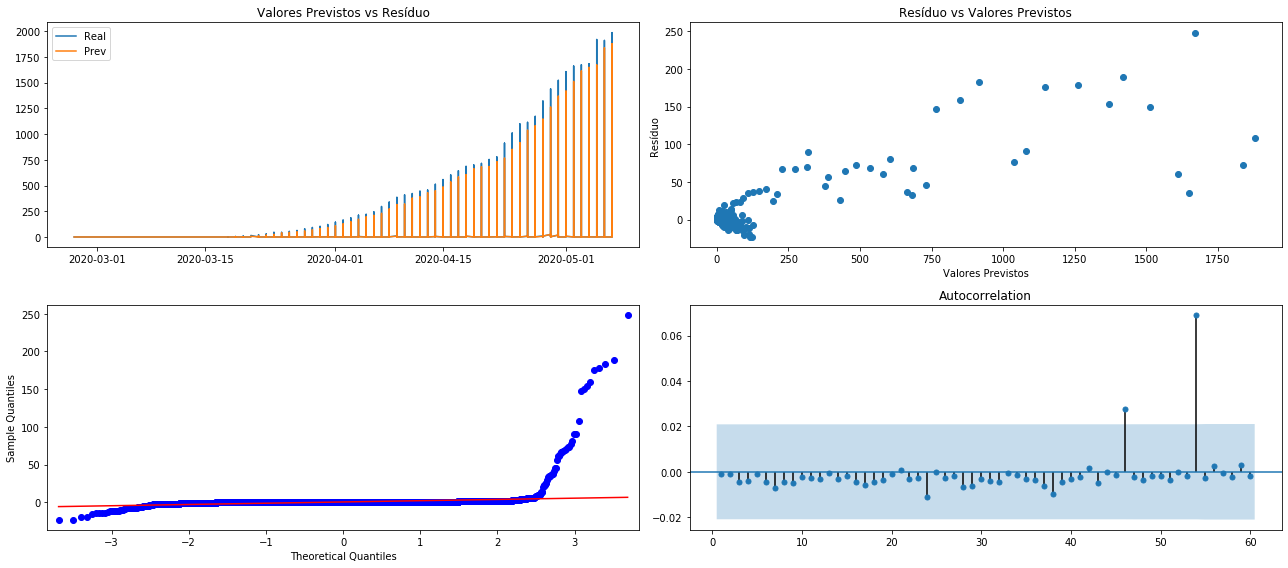

In [141]:
plotar_erro(df_mortes_teste_lasso)

* Com Random Forest com GridSearch com modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a Random Forest com GridSearch  teve desempenho pouco pior que a baseline, pior que a Random Forest sem GridSearch, mas muito melhor do que a regressão linear. O erro médio absoluto foi de 1.76 mortes, contra 0.38 mortes na baseline. Na comparação com a árvore sem modificação da target, a média das previsões todos os indicadores pioraram.


## 2.2. Método de Previsão Tradicional

### 2.2.1. Separando as bases de teste e de treino

In [142]:
explicativas

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,18,128,5,6638,-22.07300,-50.30800,0.73200,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,278,8
8791,40,128,5,35653,-22.54900,-47.91400,0.75500,12,4,4,2,0,0,20,36,8,2,0,0,0.53000,27,28,26,26,26,24,17,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,341,10
8792,21,128,5,6357,-23.13400,-49.05400,0.68500,0,0,0,0,0,0,3,5,4,0,0,0,0.53000,10,10,10,10,10,10,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,1,0,0,0,1,14,3
8793,36,128,5,18705,-22.47600,-46.63300,0.74500,1,7,2,2,0,0,3,15,6,6,0,0,0.53000,4,4,4,4,4,4,4,4,5,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,380,4


In [143]:
len(explicativas)*0.8

7036.0

In [144]:
explicativas.iloc[7036]

dias_epidemiológicos             7.00000
dia_do_ano                     124.00000
mês                              5.00000
habitantes                   21496.00000
lat                            -21.35900
                                 ...    
faixa_pop_Maior de 100 mil       0.00000
faixa_pop_Maior de 50 mil        0.00000
faixa_pop_Menor de 10 mil        0.00000
LE_munuf                       269.00000
LE_Nome_Mesorregião             12.00000
Name: 7036, Length: 59, dtype: float64

In [145]:
explicativas[explicativas['dia_do_ano']<125]

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,11,124,5,36305,-22.05900,-46.97900,0.71500,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,14,14,15,13,13,1,1,1,1,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,4
7360,31,124,5,35292,-21.34000,-47.72900,0.75600,1,1,0,0,0,0,3,10,0,0,0,0,0.53000,8,8,8,8,8,8,8,8,8,7,7,7,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,87,12
7361,19,124,5,69116,-20.28400,-50.24600,0.79700,15,17,9,5,0,5,21,49,7,7,0,0,0.53000,10,10,10,9,9,9,8,8,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,107,13
7362,53,124,5,194276,-23.54100,-46.36900,0.73800,0,0,0,0,0,0,60,80,29,27,11,2,0.61000,103,98,98,95,86,75,74,67,62,60,59,58,55,56,6,6,6,6,5,3,3,3,3,3,3,3,2,2,0,0,0,0,0,1,1,0,0,108,9


#### 2.2.1.1. Casos acumulados

##### Sem modificação da distribuição target

In [146]:
x_treino1 = expl_casos[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [147]:
x_treino1.shape

(7364, 53)

In [148]:
y_treino1.shape

(7364,)

##### Com modificação da distribuição target

In [149]:
y_treino1log = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1log = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [150]:
y_treino1log.shape

(7364,)

#### 2.2.1.2. Mortes acumuladas

##### Sem modificação da distribuição target

In [151]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [152]:
x_treino2.shape

(7364, 47)

In [153]:
y_treino2.shape

(7364,)

##### Com modificação da distribuição target

In [154]:
y_treino2log = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2log = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [155]:
y_treino2log.shape

(7364,)

### 2.2.2. Random Forest

#### 2.2.2.1. Casos Acumulados

##### Sem modificação da distribuição target

In [156]:
RFR = RandomForestRegressor(random_state=14)

In [157]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [158]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [159]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(x_treino1, y_treino1)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [160]:
grid_RFR_treino.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': 14,
 'verbose': 0}

In [161]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [162]:
y_pred1 = grid_RFR_best.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [163]:
df_casos_TREE_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_treino = df_casos_TREE_treino.iloc[0:7364]
df_casos_TREE_treino = pd.concat([df_casos_TREE_treino,y_pred1], axis=1, join='inner')
df_casos_TREE_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_treino.rename(columns=colunas, inplace=True)
df_casos_TREE_treino

,real,previsão
data,,
2020-02-26,1,1.02000
2020-02-27,1,1.02000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.18000
...,...,...
2020-05-03,14,14.21000
2020-05-03,8,8.03000
2020-05-03,10,10.30000


Text(0, 0.5, 'previsão')

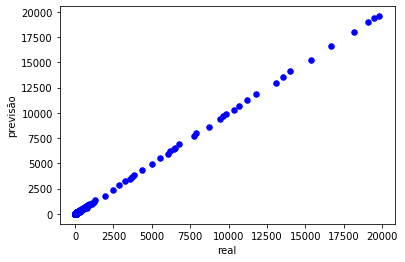

In [164]:
plt.scatter(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [165]:
df_casos_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,64.83506
std,723.44974,719.89385
min,1.00000,1.00000
25%,1.00000,1.05000
50%,3.00000,3.12000
75%,11.00000,11.22000
max,19822.00000,19550.55000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	64.83506
* std 	723.44974 	719.89385
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.05000
* 50% 	3.00000 	3.12000
* 75% 	11.00000 	11.22000
* max 	19822.00000 	19550.55000

In [166]:
df_casos_TREE_treino[df_casos_TREE_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [167]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Random Forest Sem Modificação da Distr. Target'] = check_erro(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'])
erro_treino

,Baseline,Random Forest Sem Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.26285
MSE,2087.44337,60.93252
RMSE,45.68855,7.80593
MAE,4.41214,1.02533
MAPE,11.90706,4.75876


#### Erro Treino
*  	Baseline 	Random Forest Sem Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.26285
* MSE 	2087.44337 	60.93252
* RMSE 	45.68855 	7.80593
* MAE 	4.41214 	1.02533
* MAPE 	11.90706 	4.75876

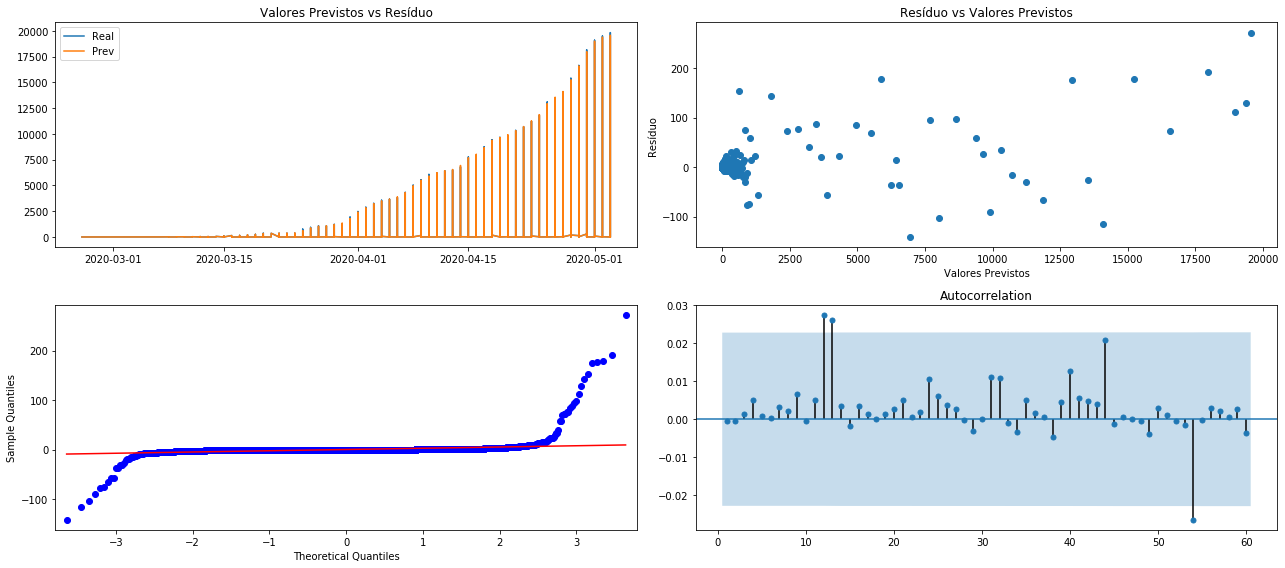

In [168]:
plotar_erro(df_casos_TREE_treino)

Com a base treino, a Random Forest com GridSearch sem modificação da distribuição target teve ótima performance sem dar overfit total. O erro absoluto médio foi de 0.14 contra 4.41 da baseline.

In [169]:
y_pred2 = grid_RFR_best.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [170]:
df_casos_TREE_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_teste = df_casos_TREE_teste.iloc[7364:]
df_casos_TREE_teste.reset_index(drop=True, inplace=True)
df_casos_TREE_teste = pd.concat([df_casos_TREE_teste,y_pred2], axis=1, join='inner')
df_casos_TREE_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_teste.rename(columns=colunas, inplace=True)
df_casos_TREE_teste

,real,previsão
data,,
2020-05-04,4,4.39000
2020-05-04,1,1.03000
2020-05-04,236,247.67000
2020-05-04,14,14.10000
2020-05-04,1,1.09000
...,...,...
2020-05-07,2,2.20000
2020-05-07,36,29.44000
2020-05-07,10,11.76000


Text(0, 0.5, 'previsão')

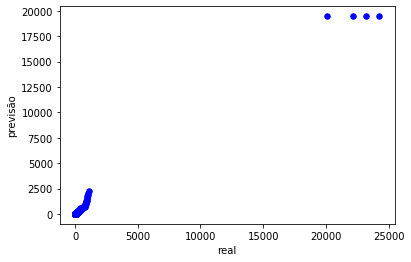

In [171]:
plt.scatter(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [172]:
df_casos_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,98.62450
std,1191.41907,1038.30365
min,1.00000,1.00000
25%,2.00000,1.39500
50%,5.00000,5.09000
75%,19.00000,19.66000
max,24273.00000,19465.24000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	98.62450
* std 	1191.41907 	1038.30365
* min 	1.00000 	1.00000
* 25% 	2.00000 	1.39500
* 50% 	5.00000 	5.09000
* 75% 	19.00000 	19.66000
* max 	24273.00000 	19465.24000

In [173]:
df_casos_TREE_teste[df_casos_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [174]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Random Forest Sem Modificação da Distr. Target'] = check_erro(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'])
erro_teste

,Baseline,Random Forest Sem Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,3.24273
MSE,4835.93082,34803.39440
RMSE,69.54086,186.55668
MAE,5.92383,15.27726
MAPE,11.07093,14.40768


#### Erro Teste
*  	Baseline 	Random Forest Sem Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	3.24273
* MSE 	4835.93082 	34803.39440
* RMSE 	69.54086 	186.55668
* MAE 	5.92383 	15.27726
* MAPE 	11.07093 	14.40768

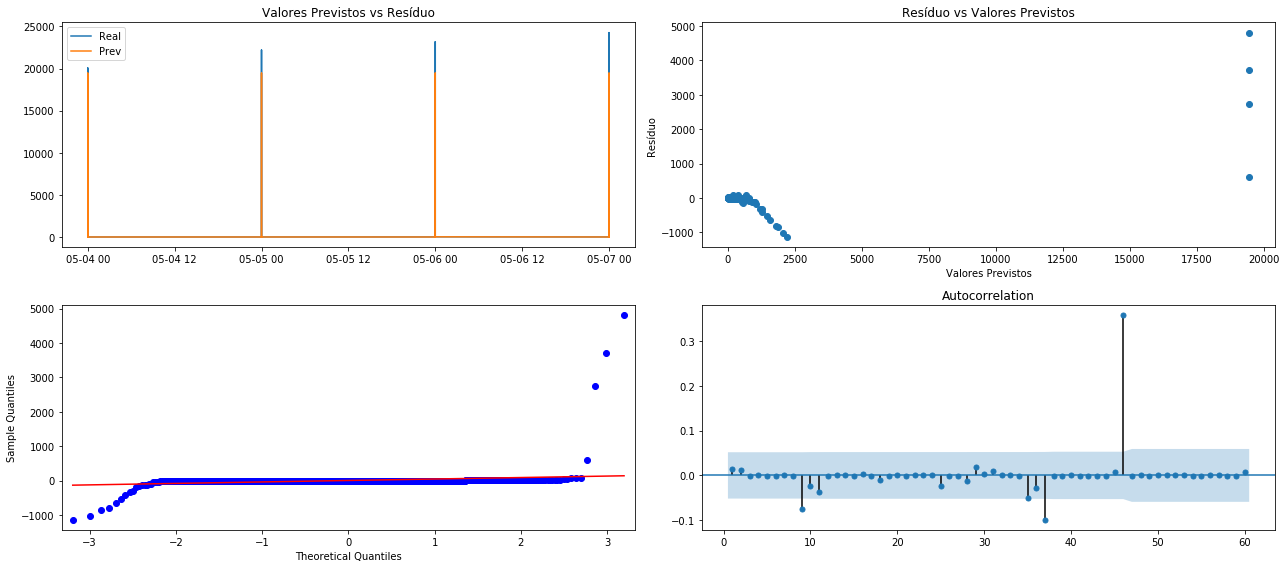

In [175]:
plotar_erro(df_casos_TREE_teste)

Com a base teste, a Random Forest com GridSearch sem modificação da distribuição target teve desempenho pior que a baseline, e equivalente à Random Forest sem GridSearch. O erro médio absoluto foi de 18.8, contra 16.4 casos na Random Forest sem GridSearch, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior). Porém, Viés, MSE, RMSE e MAPE tiveram performance melhor na árvore com GridSearch. A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [176]:
RFR = RandomForestRegressor(random_state=14)

In [177]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [178]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [179]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(x_treino1, y_treino1log)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [180]:
grid_RFR_treino.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': None,
 'n_estimators': 100,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': 14,
 'verbose': 0}

In [181]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [182]:
y_pred1 = grid_RFR_best.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [183]:
df_casos_TREE_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_treino = df_casos_TREE_treino.iloc[0:7364]
df_casos_TREE_treino = pd.concat([df_casos_TREE_treino,y_pred1], axis=1, join='inner')
df_casos_TREE_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_treino.rename(columns=colunas, inplace=True)
df_casos_TREE_treino

,real,previsão
data,,
2020-02-26,1,1.00000
2020-02-27,1,1.00000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.00000
...,...,...
2020-05-03,14,14.00000
2020-05-03,8,8.00000
2020-05-03,10,10.00000


Text(0, 0.5, 'previsão')

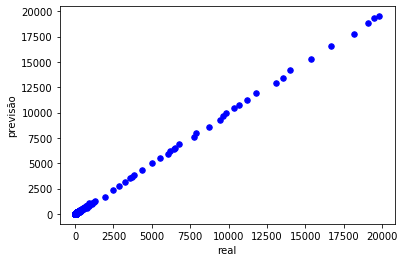

In [184]:
plt.scatter(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [185]:
df_casos_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,64.65684
std,723.44974,718.69589
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,11.00000,11.00000
max,19822.00000,19499.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	64.65684
* std 	723.44974 	718.69589
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	11.00000 	11.00000
* max 	19822.00000 	19499.00000

In [186]:
df_casos_TREE_treino[df_casos_TREE_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [187]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Random Forest Com Modificação da Distr. Target'] = check_erro(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'])
erro_treino

,Baseline,Random Forest Com Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.44106
MSE,2087.44337,117.14775
RMSE,45.68855,10.82348
MAE,4.41214,1.12520
MAPE,11.90706,2.11817


#### Erro Treino
*  	Baseline 	Random Forest Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.44106
* MSE 	2087.44337 	117.14775
* RMSE 	45.68855 	10.82348
* MAE 	4.41214 	1.12520
* MAPE 	11.90706 	2.11817

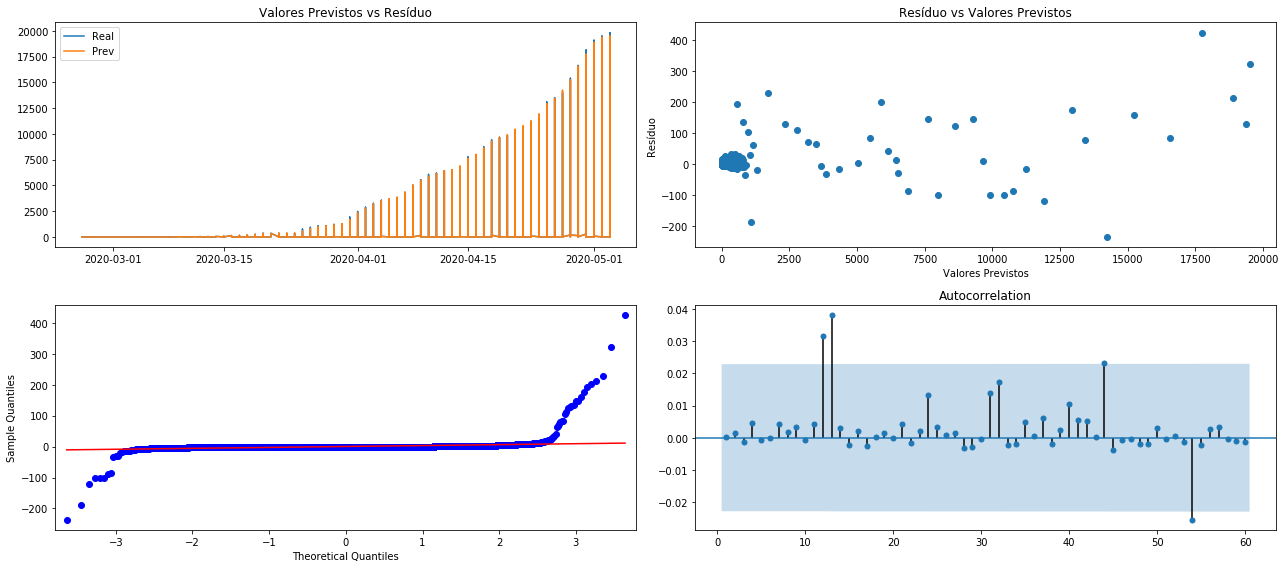

In [188]:
plotar_erro(df_casos_TREE_treino)

Com a base treino, a Random Forest com modificação da distribuição target e GridSearch não deu overfit, como na árvore sem GridSearch, mas a previsão não criou uma curva e sim 3 patamares, invalidando o modelo.

In [189]:
y_pred2 = grid_RFR_best.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [190]:
df_casos_TREE_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_teste = df_casos_TREE_teste.iloc[7364:]
df_casos_TREE_teste.reset_index(drop=True, inplace=True)
df_casos_TREE_teste = pd.concat([df_casos_TREE_teste,y_pred2], axis=1, join='inner')
df_casos_TREE_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_teste.rename(columns=colunas, inplace=True)
df_casos_TREE_teste

,real,previsão
data,,
2020-05-04,4,4.00000
2020-05-04,1,1.00000
2020-05-04,236,245.00000
2020-05-04,14,14.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,2,2.00000
2020-05-07,36,29.00000
2020-05-07,10,12.00000


Text(0, 0.5, 'previsão')

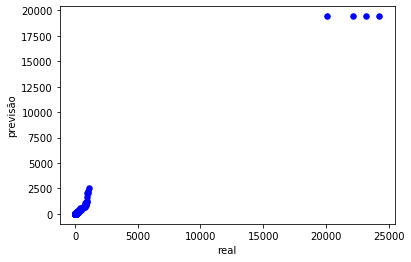

In [191]:
plt.scatter(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [192]:
df_casos_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,98.27603
std,1191.41907,1037.27744
min,1.00000,1.00000
25%,2.00000,1.00000
50%,5.00000,5.00000
75%,19.00000,19.00000
max,24273.00000,19430.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	98.27603
* std 	1191.41907 	1037.27744
* min 	1.00000 	1.00000
* 25% 	2.00000 	1.00000
* 50% 	5.00000 	5.00000
* 75% 	19.00000 	19.00000
* max 	24273.00000 	19430.00000

In [193]:
df_casos_TREE_teste[df_casos_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [194]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Random Forest Com Modificação da Distr. Target'] = check_erro(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'])
erro_teste

,Baseline,Random Forest Com Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,3.59119
MSE,4835.93082,36779.68484
RMSE,69.54086,191.78030
MAE,5.92383,15.44165
MAPE,11.07093,10.30301


#### Erro Teste
*  	Baseline 	Random Forest Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	3.59119
* MSE 	4835.93082 	36779.68484
* RMSE 	69.54086 	191.78030
* MAE 	5.92383 	15.44165
* MAPE 	11.07093 	10.30301

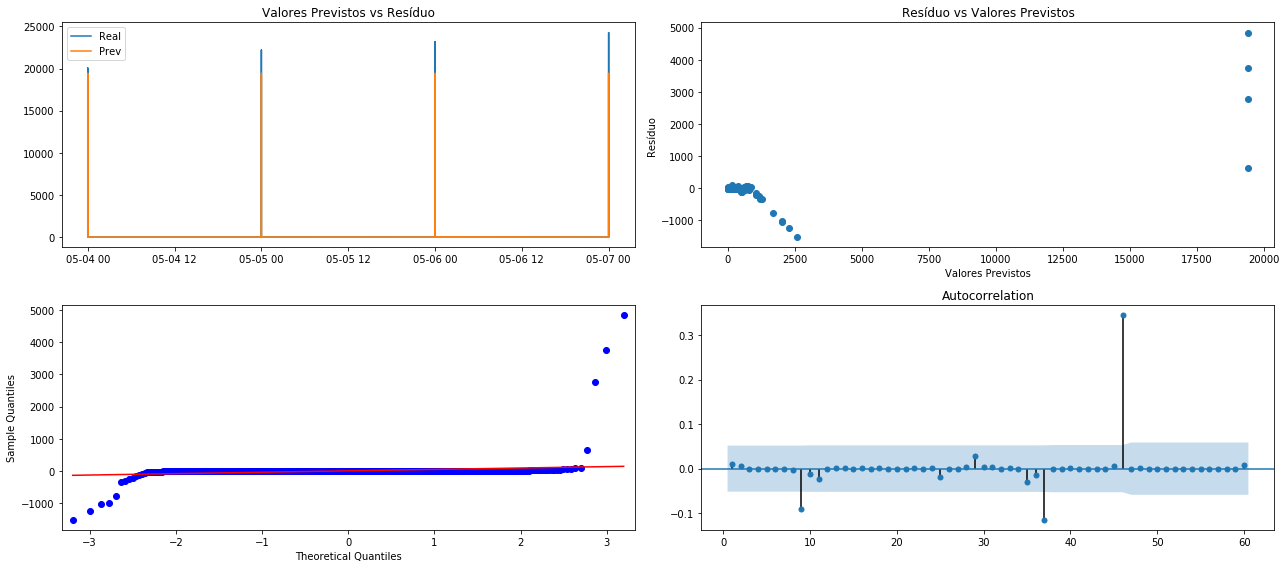

In [195]:
plotar_erro(df_casos_TREE_teste)

Com a base teste, a Random Forest com modificação da distribuição target e GridSearch teve desempenho pior que a baseline e que a árvore sem GridSearch. O erro médio absoluto foi de 35.25 casos, contra 20.5 casos da Random Forest sem GridSearch, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior). Em comparação com a árvore sem modificação da distribuição target e GridSearch, vemos que houve piora em todos os indicadores

#### 2.2.2.2. Mortes Acumuladas

##### Sem modificação da distribuição target

In [196]:
RFR = RandomForestRegressor(random_state=14)

In [197]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [198]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [199]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(x_treino2,y_treino2)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [200]:
grid_RFR_treino.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_features': 'sqrt',
 'n_estimators': 250,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0}

In [201]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [202]:
y_pred1 = grid_RFR_best.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [203]:
df_mortes_TREE_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_treino = df_mortes_TREE_treino.iloc[0:7364]
df_mortes_TREE_treino = pd.concat([df_mortes_TREE_treino,y_pred1], axis=1, join='inner')
df_mortes_TREE_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_treino.rename(columns=colunas, inplace=True)
df_mortes_TREE_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,2.00000
2020-05-03,1,1.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

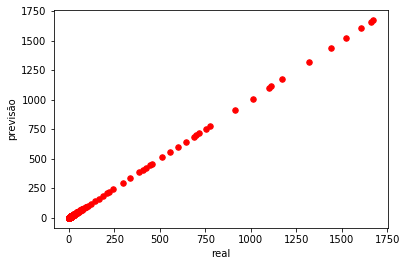

In [204]:
plt.scatter(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [205]:
df_mortes_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.98669
std,58.68772,58.68772
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,1673.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.98669
* std 	58.68772 	58.68772
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1673.00000 	1673.00000

In [206]:
df_mortes_TREE_treino[df_mortes_TREE_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [207]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Random Forest Sem Modificação da Distr. Target'] = check_erro(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'])
erro_treino

,Baseline,Random Forest Sem Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.00000
MSE,16.43061,0.00000
RMSE,4.05347,0.00000
MAE,0.36353,0.00000
MAPE,9.64655,0.00000


#### Erro Treino
*  	Baseline 	Random Forest Sem Modificação da Distr. Target
* Base Treino 		
* VIÉS 	0.35646 	0.00000
* MSE 	16.43061 	0.00000
* RMSE 	4.05347 	0.00000
* MAE 	0.36353 	0.00000
* MAPE 	9.64655 	0.00000

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


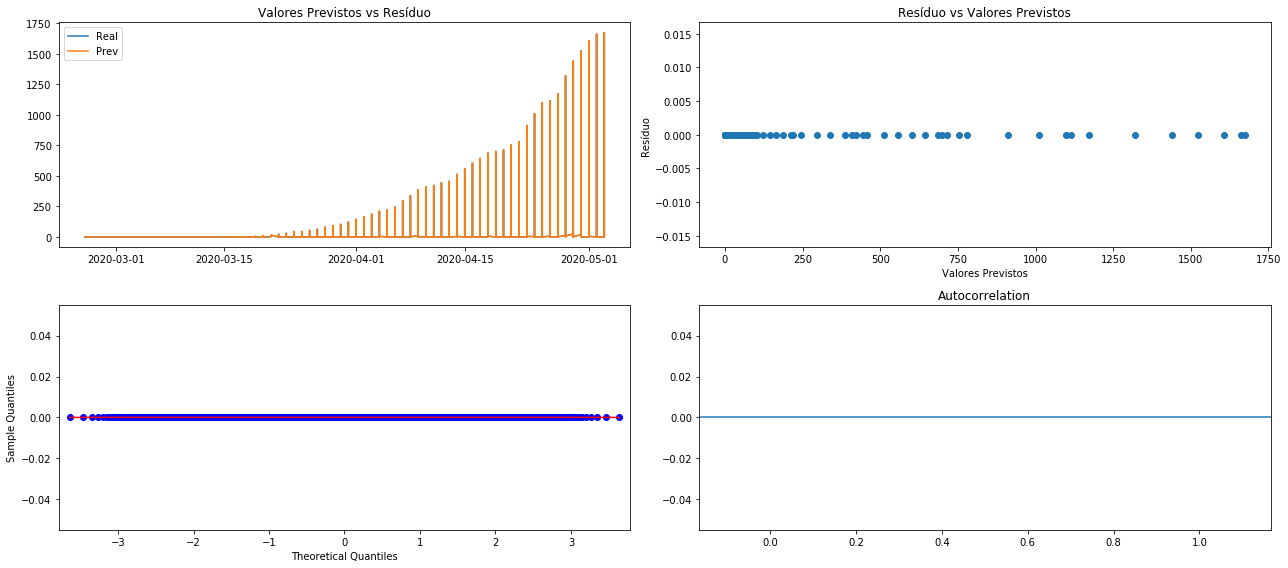

In [208]:
plotar_erro(df_mortes_TREE_treino)

Com a base treino, a Random Forest sem modificação da distribuição target e com GridSearch não deu overfit, e apresentou métricas melhores que a baseline.

In [209]:
y_pred2 = grid_RFR_best.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [210]:
df_mortes_TREE_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_teste = df_mortes_TREE_teste.iloc[7364:]
df_mortes_TREE_teste.reset_index(drop=True, inplace=True)
df_mortes_TREE_teste = pd.concat([df_mortes_TREE_teste,y_pred2], axis=1, join='inner')
df_mortes_TREE_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_teste.rename(columns=colunas, inplace=True)
df_mortes_TREE_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,11.99200
2020-05-04,3,3.16400
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00400
2020-05-07,0,0.35600
2020-05-07,2,2.34000


Text(0, 0.5, 'previsão')

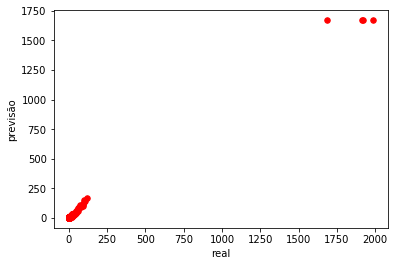

In [211]:
plt.scatter(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [212]:
df_mortes_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,8.16861
std,99.52253,88.87732
min,0.00000,0.00000
25%,0.00000,0.00800
50%,0.00000,0.11200
75%,2.00000,2.02800
max,1986.00000,1669.64400


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	8.16861
* std 	99.52253 	88.87732
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00800
* 50% 	0.00000 	0.11200
* 75% 	2.00000 	2.02800
* max 	1986.00000 	1669.64400

In [213]:
df_mortes_TREE_teste[df_mortes_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [214]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Random Forest Sem Modificação da Distr. Target'] = check_erro(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'])
erro_teste

,Baseline,Random Forest Sem Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,0.17870
MSE,44.75681,163.43438
RMSE,6.69005,12.78415
MAE,0.47729,1.15826
MAPE,6.72089,inf


#### Erro Treino
* Baseline 	Random Forest Sem Modificação da Distr. Target
* Base Teste 		
* VIÉS 	0.40601 	0.17870
* MSE 	44.75681 	163.43438
* RMSE 	6.69005 	12.78415
* MAE 	0.47729 	1.15826
* MAPE 	6.72089 	inf

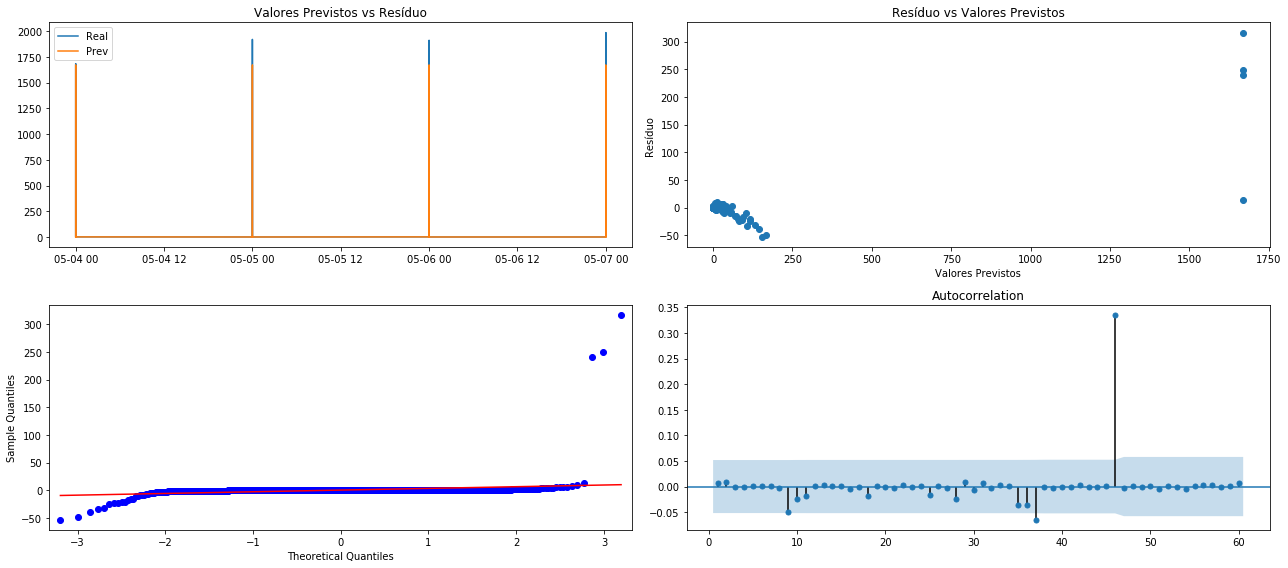

In [215]:
plotar_erro(df_mortes_TREE_teste)

Com a base teste, a Random Forest sem modificação da distribuição target e com GridSearch teve desempenho pior que a baseline, mas melhorou em relação à árvore sem GridSearch. O erro médio absoluto foi de 1.13 mortes, contra 1.24 mortes da árvore sem GridSearch, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior). A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [216]:
RFR = RandomForestRegressor(random_state=14)

In [217]:
grid_RFR = {'n_estimators': [100, 250, 500],
            'criterion': ["mse", "mae"],
            #'max_depth':[None, 50, 100],
            #'min_samples_split': [2,5,10],
            #'min_samples_leaf':[1, 50, 100],
            #'min_weight_fraction_leaf': [0.0, 0.1, 0.5],
            'max_features': ["auto", "sqrt", "log2", None],
            #'max_leaf_nodes': [None,10,20,30,50,100],
            #'min_impurity_decrease': [0.0,0.1,0.5,1.0],            
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [4],
            'random_state': [14],
            'verbose':[0],
            #'warm_start':[True, False],            
            #'ccp_alpha':[0.0,0.5,1.0],            
           }

In [218]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [219]:
grid_RFR_treino = GridSearchCV(estimator=RFR,
                                param_grid=grid_RFR,
                                scoring=scoring,
                                cv=2,
                                verbose=1,
                                refit='neg_mean_absolute_error',
                                return_train_score=True
                               )
grid_RFR_treino.fit(x_treino2,y_treino2log)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gusta\anaconda3\lib\site-packages\sklearn\model_selection\_vali

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=14),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 250, 500], 'n_jobs': [4],
                         'oob_score': [True, False], 'random_state': [14],
                         'verbose': [0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error',
                      'neg_root_mean_squared_error'],
             verbose=1)

In [220]:
grid_RFR_treino.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0}

In [221]:
grid_RFR_best = grid_RFR_treino.best_estimator_

In [222]:
y_pred1 = grid_RFR_best.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [223]:
df_mortes_TREE_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_treino = df_mortes_TREE_treino.iloc[0:7364]
df_mortes_TREE_treino = pd.concat([df_mortes_TREE_treino,y_pred1], axis=1, join='inner')
df_mortes_TREE_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_treino.rename(columns=colunas, inplace=True)
df_mortes_TREE_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,2.00000
2020-05-03,1,1.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

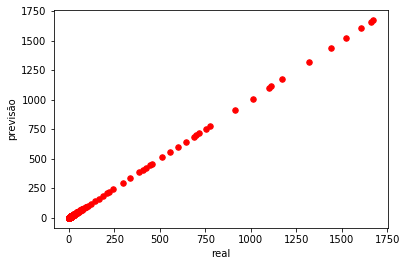

In [224]:
plt.scatter(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [225]:
df_mortes_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.98669
std,58.68772,58.68772
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,1673.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.98669
* std 	58.68772 	58.68772
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1673.00000 	1673.00000

In [226]:
df_mortes_TREE_treino[df_mortes_TREE_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [227]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Random Forest Com Modificação da Distr. Target'] = check_erro(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'])
erro_treino

,Baseline,Random Forest Com Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.00000
MSE,16.43061,0.00000
RMSE,4.05347,0.00000
MAE,0.36353,0.00000
MAPE,9.64655,0.00000


#### Erro Treino
* Baseline 	Random Forest Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	0.35646 	0.00000
* MSE 	16.43061 	0.00000
* RMSE 	4.05347 	0.00000
* MAE 	0.36353 	0.00000
* MAPE 	9.64655 	0.00000

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


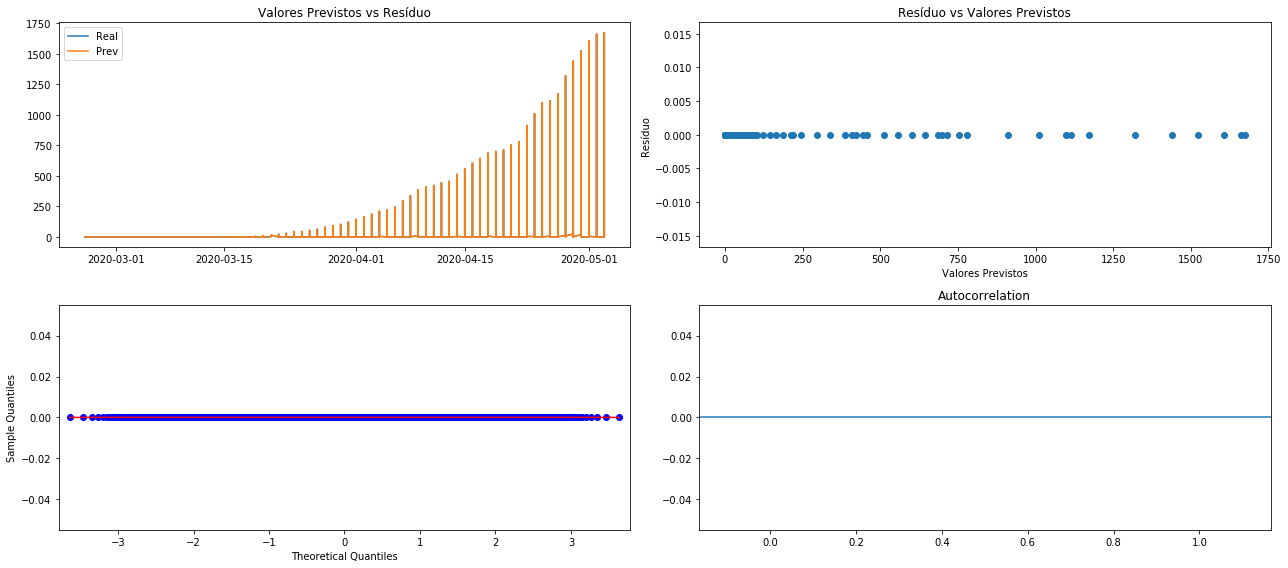

In [228]:
plotar_erro(df_mortes_TREE_treino)

Com a base treino, a Random Forest com modificação da distribuição target e GridSearch teve o mesmo comportamento quando lidou com casos: ao invés de projetar uma curva, criou 3 patamares de previsão, invalidando o modelo.

In [229]:
y_pred2 = grid_RFR_best.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [230]:
df_mortes_TREE_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_teste = df_mortes_TREE_teste.iloc[7364:]
df_mortes_TREE_teste.reset_index(drop=True, inplace=True)
df_mortes_TREE_teste = pd.concat([df_mortes_TREE_teste,y_pred2], axis=1, join='inner')
df_mortes_TREE_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_teste.rename(columns=colunas, inplace=True)
df_mortes_TREE_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,12.00000
2020-05-04,3,3.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.00000
2020-05-07,2,2.00000


Text(0, 0.5, 'previsão')

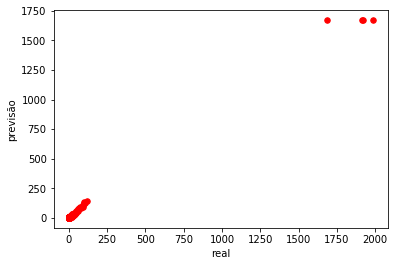

In [231]:
plt.scatter(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [232]:
df_mortes_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,7.97275
std,99.52253,88.83203
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,2.00000
max,1986.00000,1671.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	7.97275
* std 	99.52253 	88.83203
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	2.00000 	2.00000
* max 	1986.00000 	1671.00000

In [233]:
df_mortes_TREE_teste[df_mortes_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [234]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Random Forest Com Modificação da Distr. Target'] = check_erro(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'])
erro_teste

,Baseline,Random Forest Com Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,0.37456
MSE,44.75681,156.90985
RMSE,6.69005,12.52637
MAE,0.47729,0.98532
MAPE,6.72089,9.32019


#### Erro Teste
*  	Baseline 	Random Forest Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	0.40601 	0.37456
* MSE 	44.75681 	156.90985
* RMSE 	6.69005 	12.52637
* MAE 	0.47729 	0.98532
* MAPE 	6.72089 	9.32019

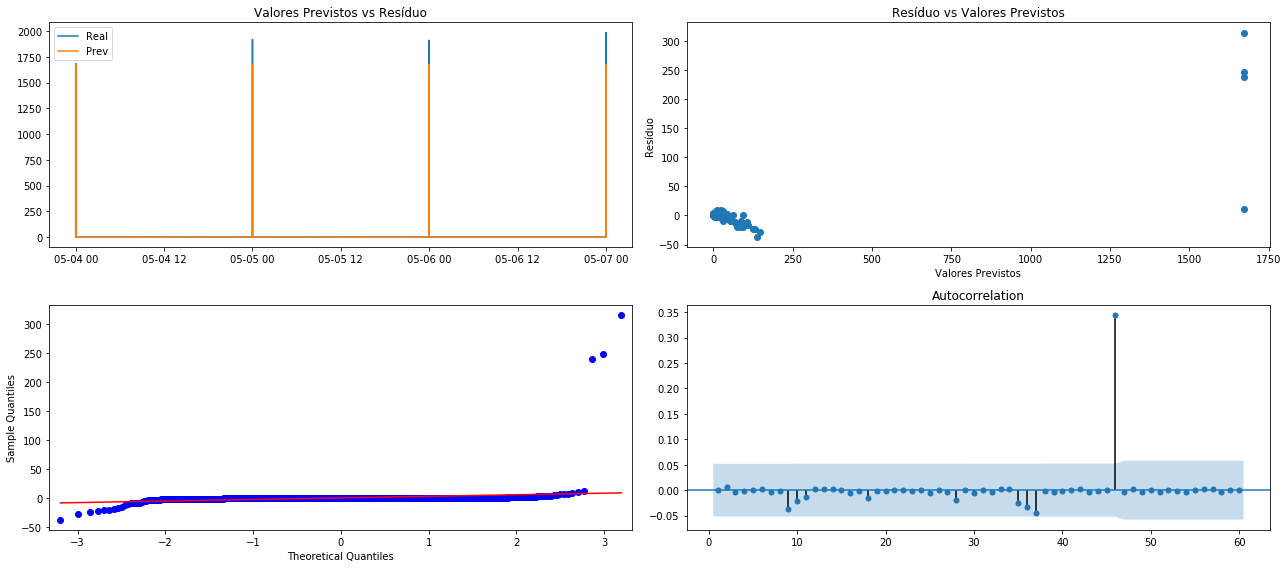

In [235]:
plotar_erro(df_mortes_TREE_teste)

Com a base teste, a Random Forest com modificação da distribuição target e GridSearch teve desempenho pior que a baseline e pior que a árvore sem GridSearch. O erro médio absoluto foi de 1.79 mortes, contra 1.03 mortes na árvore sem GridSearch, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior).
